In [1]:
import qiskit
import math
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

In [2]:
maximum = int(input("Enter maximum number: "))
maximum_bin = bin(maximum)[2:]
length = len(str(maximum_bin))
print("Maximum number: ",maximum)
print("Its binary representation: ", maximum_bin) 
print("Length of the binary: ", length)

Enter maximum number:  5


Maximum number:  5
Its binary representation:  101
Length of the binary:  3


In [3]:
list_nums = [i for i in range(maximum + 1)]
print("Possible outcomes: ", list_nums)

Possible outcomes:  [0, 1, 2, 3, 4, 5]


In [4]:
list_binaries = [ bin(num)[2:].zfill(length) for num in range(int(maximum + 1))]
print("Bninary values of possible outcomes: ",list_binaries)

Bninary values of possible outcomes:  ['000', '001', '010', '011', '100', '101']


In [5]:
wires = math.ceil(math.log(maximum, 2))
print("The number of wires are: ", wires)

The number of wires are:  3


In [6]:
qc = QuantumCircuit(wires)
qc.h([i for i in range(wires)])
qc.measure_all()
print(qc.draw())

        ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├─░─┤M├──────
        ├───┤ ░ └╥┘┌─┐   
   q_1: ┤ H ├─░──╫─┤M├───
        ├───┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─░──╫──╫─┤M├
        └───┘ ░  ║  ║ └╥┘
meas: 3/═════════╩══╩══╩═
                 0  1  2 


In [7]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=maximum*1024)
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'110': 644, '100': 648, '111': 652, '011': 640, '101': 614, '000': 630, '010': 588, '001': 704}


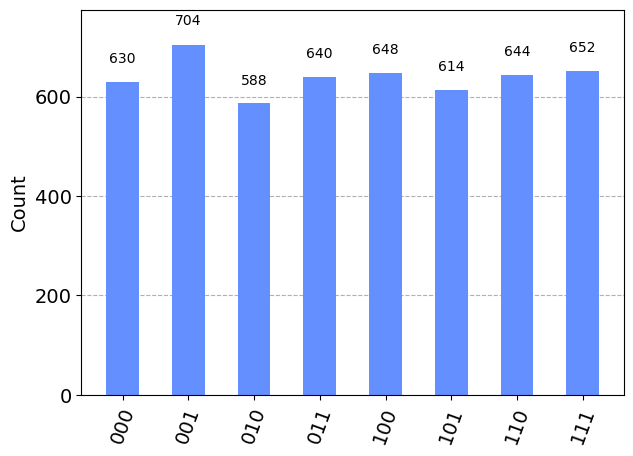

In [12]:
plot_histogram(counts)

In [13]:
random_number = int(list(counts.keys())[list(counts.values()).index(max(counts.values()))], 2)
random_number = random_number % maximum
print(random_number)

1
